## Plotting variability below and above the sill

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr
import itertools
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# import cmocean

In [2]:
# load interpolated temp and salinity datasets for Rink
rink_temp_interp_ds = xr.open_dataset('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_interpolated/OMG_Narwhals_Mooring_Rink_1D_interpolated_temp_profile.nc')

In [3]:
# open Rink 2019 dataset
file_dir = Path('/Volumes/OMGNarwhals/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
rink_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_RinkFisher_1D_L3_2018-2019.nc")
rink_ds.close()

Plot

(700.0, 60.0)

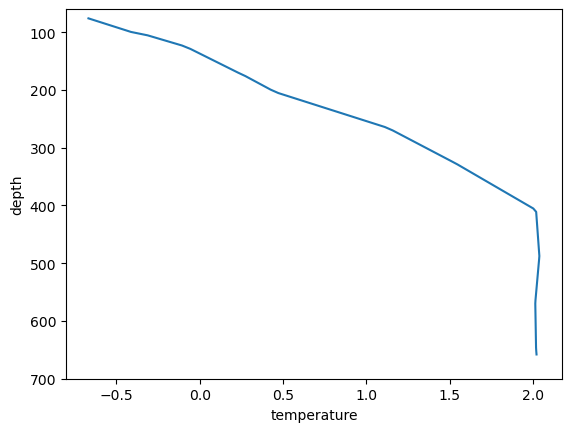

In [4]:
rink_temp_interp_ds.temperature.mean(dim='time',skipna=True).plot(y='depth')
plt.ylim(700,60)

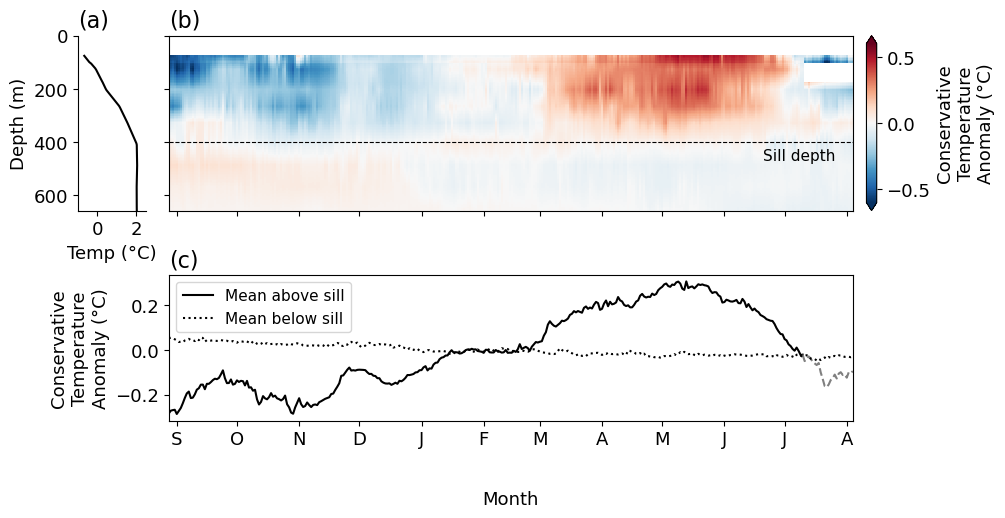

In [7]:
plt.rcParams['font.size'] = '13'
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, gridspec_kw={'height_ratios': [1.2, 1], 'width_ratios': [0.4, 4]}, figsize=[10,5])
plt.subplots_adjust(wspace=0.06, hspace=0.4)

## axis 1 -----------------------------------------------------------------------------
rink_temp_interp_ds.temperature.mean(dim='time',skipna=True).plot(y='depth',ax=ax1,c='k')
# Hide the right and top spines
ax1.spines[['right', 'top']].set_visible(False)

## axis 2 -----------------------------------------------------------------------------
# plot temperature anomaly
delta = rink_temp_interp_ds.temperature - rink_temp_interp_ds.temperature.mean(dim='time',skipna=True)
cbar = delta.plot(ax=ax2, cmap='RdBu_r',vmin=-0.6,vmax=0.6,add_colorbar=False)

## add colorbar 
axins = inset_axes(
    ax2,
    width="1.5%",  # width: 5% of parent_bbox width
    height="100%",
    loc="upper left",
    bbox_to_anchor=(1.02, 0, 1, 1), # change these values to adjust position of colorbar
    bbox_transform=ax2.transAxes,
    borderpad=0)

fig.colorbar(cbar, cax=axins, label='Conservative\nTemperature\nAnomaly (°C)', orientation='vertical', extend='both')

# add horizontal dashed line for sill depth
ax2.axhline(400, c='k', linewidth='0.8', linestyle='dashed')
ax2.text(np.datetime64('2019-06-20'), 470, 'Sill depth', size=11, ha='left');

## add sensor depths
# ax1.plot(list(itertools.repeat(0, len(rink_ds.depth_temperature))), rink_ds.depth_temperature.values,">", color='black', markersize=4, clip_on=False,label='Sensor depth');
# ax2.plot(list(itertools.repeat(rink_ds.time[0].values-1, len(rink_ds.depth_temperature))), rink_ds.depth_temperature.values,">", color='black', markersize=4, clip_on=False,label='Sensor depth');

## axis 4 -----------------------------------------------------------------------------
above_sill = rink_temp_interp_ds.temperature.interpolate_na(dim='depth').sel(depth=slice(0,400)).mean(dim='depth')
below_sill = rink_temp_interp_ds.temperature.sel(depth=slice(400,700)).mean(dim='depth')

(above_sill-above_sill.mean()).sel(time=slice(above_sill.time.values[0],'2019-07-10')).plot(ax=ax4, c='k', label='Mean above sill')
(above_sill-above_sill.mean()).sel(time=slice('2019-07-10', above_sill.time.values[-1])).plot(ax=ax4, c='gray', linewidth='1.5', linestyle='--')
(below_sill-below_sill.mean()).plot(ax=ax4, c='k', linestyle=':', label='Mean below sill')

ax4.legend(fontsize="11")

# subplot formatting -----------------------------------------------------------------------

# settings for ticks and tick labels
# set axis limits
ax1.set_xlim(-1,2.5)
ax1.set_ylim(rink_temp_interp_ds.depth.max(),rink_temp_interp_ds.depth.min()-50)
ax2.set_ylim(rink_temp_interp_ds.depth.max(),rink_temp_interp_ds.depth.min()-50)

ax2.set_xlim(rink_temp_interp_ds.time.values[0],rink_temp_interp_ds.time.values[-1])
ax4.set_xlim(rink_temp_interp_ds.time.values[0],rink_temp_interp_ds.time.values[-1])

months18 = pd.period_range(np.datetime64('2018-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
abbrev = ["S","O",'N','D',"J",'F','M','A','M','J','J','A']
ax2.set_xticks(months18, [])
ax4.set_xticks(months18, abbrev, rotation=0, horizontalalignment = 'center')

ax1.set_xticks([0,2])
depth_ticks = [600,400,200,0]
ax1.set_yticks(depth_ticks, depth_ticks)
ax2.set_yticks(depth_ticks, [])

# axis labels
ax1.set_ylabel("Depth (m)")
ax1.set_xlabel("Temp (°C)")
ax2.set_ylabel("")
ax4.set_ylabel('Conservative\nTemperature\nAnomaly (°C)')
ax2.set_xlabel("")
ax4.set_xlabel("Month", labelpad=30)

ax1.set_title("(a)",loc='left', fontsize = 16)
ax2.set_title("(b)",loc='left', fontsize = 16)
ax4.set_title("(c)",loc='left', fontsize = 16);

# turn off axis 3
ax3.axis('off');

plt.savefig("figures/sill_variability_figure.png", bbox_inches='tight', dpi=300)

Version without the mean profile

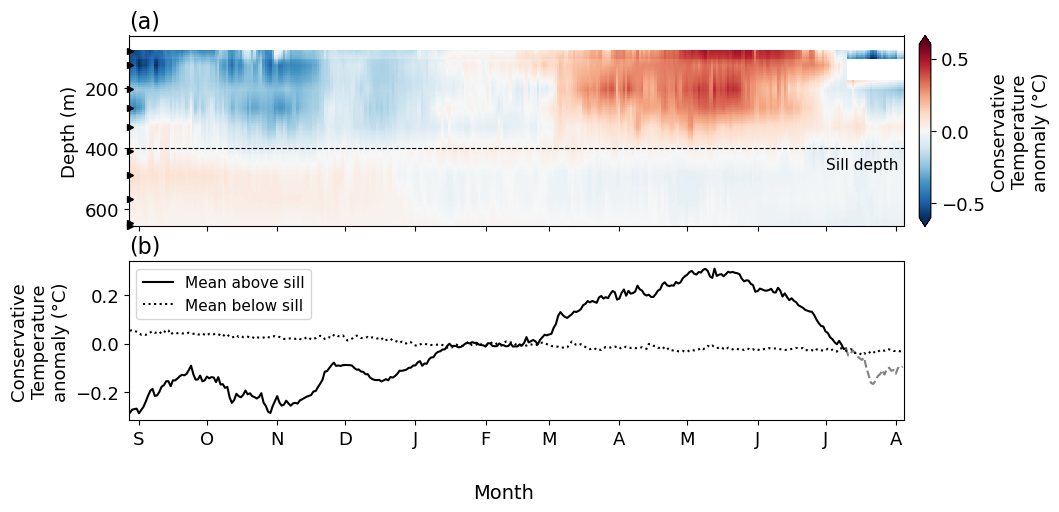

In [6]:
plt.rcParams['font.size'] = '13'
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': [1.2, 1]}, figsize=[10,5])

## axis 1 -----------------------------------------------------------------------------
# plot temperature anomaly
delta = rink_temp_interp_ds.temperature - rink_temp_interp_ds.temperature.mean(dim='time',skipna=True)
cbar = delta.plot(ax=ax1, cmap='RdBu_r',vmin=-0.6,vmax=0.6,add_colorbar=False)

## add colorbar -----------------------------------------------------------------------
axins = inset_axes(
    ax1,
    width="1.5%",  # width: 5% of parent_bbox width
    height="100%",
    loc="upper left",
    bbox_to_anchor=(1.02, 0, 1, 1), # change these values to adjust position of colorbar
    bbox_transform=ax1.transAxes,
    borderpad=0)

fig.colorbar(cbar, cax=axins, label='Conservative\nTemperature\nanomaly (°C)', orientation='vertical', extend='both')

# add horizontal dashed line for sill depth
ax1.axhline(400, c='k', linewidth='0.8', linestyle='dashed')
ax1.text(np.datetime64('2019-07-01'), 470, 'Sill depth', size=11, ha='left');

## add sensor depths
ax1.plot(list(itertools.repeat(rink_ds.time[0].values-1, len(rink_ds.depth_temperature))), rink_ds.depth_temperature.values,">", color='black', markersize=4, clip_on=False,label='Sensor depth');
# ax1.legend(bbox_to_anchor=(0.75, -0.3, 1, 1));

## axis 2 -----------------------------------------------------------------------------
above_sill = rink_temp_interp_ds.temperature.interpolate_na(dim='depth').sel(depth=slice(0,400)).mean(dim='depth')
below_sill = rink_temp_interp_ds.temperature.sel(depth=slice(400,700)).mean(dim='depth')

(above_sill-above_sill.mean()).sel(time=slice(above_sill.time.values[0],'2019-07-10')).plot(ax=ax2, c='k', label='Mean above sill')
(above_sill-above_sill.mean()).sel(time=slice('2019-07-10', above_sill.time.values[-1])).plot(ax=ax2, c='gray', linewidth='1.5', linestyle='--')
(below_sill-below_sill.mean()).plot(ax=ax2, c='k', linestyle=':', label='Mean below sill')

ax2.legend(fontsize="11")

# subplot formatting -----------------------------------------------------------------------
# settings for ticks and tick labels ----------------------------------------------------
months18 = pd.period_range(np.datetime64('2018-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
abbrev = ["S","O",'N','D',"J",'F','M','A','M','J','J','A']
ax2.set_xticks(months18, abbrev, rotation=0, horizontalalignment = 'center')
# ax2.tick_params(labelbottom=True)

ax1.set_ylabel("Depth (m)")
ax2.set_ylabel('Conservative\nTemperature\nanomaly (°C)')
ax1.set_xlabel("")
ax2.set_xlabel("")

ax1.set_title("(a)",loc='left', fontsize = 16)
ax2.set_title("(b)",loc='left', fontsize = 16);

fig.text(0.5, -0.045, 'Month', size=14, ha='center')

# set axis limits
ax1.set_ylim(rink_temp_interp_ds.depth.max(),rink_temp_interp_ds.depth.min()-50);

# plt.savefig("figures/sill_variability_figure.png", bbox_inches='tight', dpi=300)